In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##Cargando el dataset iris

In [10]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
iris.to_csv("iris.csv", index=False)

##Implementando la clase

In [29]:
class DataReader:
  def __init__(self,data):
    self.dataframe = pd.read_csv(data)
    self.size = len(self.dataframe)
    self.call = 0

  def return_data(self):
    self.call = self.call + 2
    if self.size+1 < self.call:
      raise Exception("Error, los datos se han agotado.")
    else:
      return  self.dataframe.iloc[self.call-2:self.call]

#Implemento la clase a partir de la clase creada en el punto anterior utilizando Herencia
class DataEDA (DataReader):
  def calculate_EDA(self):
    EDA = np.zeros((6,sum(self.dataframe.dtypes == 'float64')))
    col_names = []
    i = 0
    for name in self.dataframe.columns:
      if self.dataframe[name].dtype == 'float64':
        EDA[0][i] = self.dataframe[name].mean()
        EDA[1][i] = self.dataframe[name].median()
        EDA[2][i] = self.dataframe[name].std()
        EDA[3][i] = self.dataframe[name].quantile(0.25)
        EDA[4][i] = self.dataframe[name].quantile(0.5)
        EDA[5][i] = self.dataframe[name].quantile(0.75)
        col_names.append(name)
        i = i + 1

    EDA_dataframe = pd.DataFrame(EDA, columns= col_names, index=['media', 'mediana', 'desv_est', 'cuartil1', 'cuartil2', 'cuartil3'])
    return EDA_dataframe

  def names(self):
    return self.dataframe.columns.tolist()

  def one_variable_EDA(self,variable):
    EDA = np.zeros((6,1))
    EDA[0] = self.dataframe[variable].mean()
    EDA[1] = self.dataframe[variable].median()
    EDA[2] = self.dataframe[variable].std()
    EDA[3] = self.dataframe[variable].quantile(0.25)
    EDA[4] = self.dataframe[variable].quantile(0.5)
    EDA[5] = self.dataframe[variable].quantile(0.75)

    EDA_dataframe = pd.DataFrame(EDA, columns=[variable], index=['media', 'mediana', 'desv_est', 'cuartil1', 'cuartil2', 'cuartil3'])

    plt.figure(figsize=(8, 4))
    plt.hist(self.dataframe[variable], bins=20, alpha=0.7, color="green",edgecolor='black')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.title('Histograma de {}'.format(variable))
    plt.grid(alpha=0.3, linestyle='--')
    plt.show()
    return EDA_dataframe
  

##Probando la clase

In [30]:
pruebaEDA = DataEDA("iris.csv")

In [31]:
pruebaEDA.calculate_EDA()

,sepal_length,sepal_width,petal_length,petal_width
media,5.843333,3.057333,3.758000,1.199333
mediana,5.800000,3.000000,4.350000,1.300000
desv_est,0.828066,0.435866,1.765298,0.762238
cuartil1,5.100000,2.800000,1.600000,0.300000
cuartil2,5.800000,3.000000,4.350000,1.300000
cuartil3,6.400000,3.300000,5.100000,1.800000


In [32]:
pruebaEDA.names()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

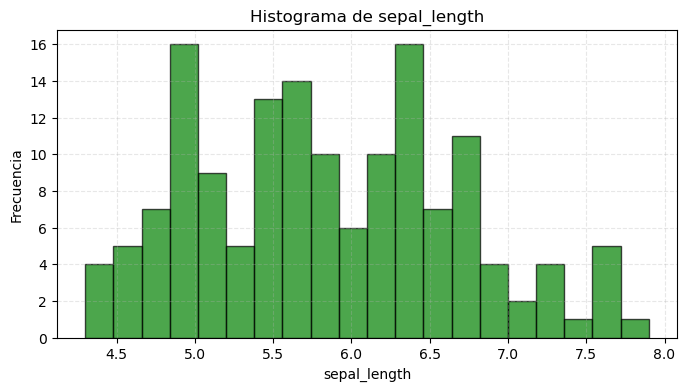

,sepal_length
media,5.843333
mediana,5.800000
desv_est,0.828066
cuartil1,5.100000
cuartil2,5.800000
cuartil3,6.400000


In [33]:
pruebaEDA.one_variable_EDA('sepal_length')